note: usage: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

In [2]:
# if (old_trainig_ds == 'on'):

def rename_oldDS_columns(in_transect):
    # rename columns
    if (in_transect.iloc[:,5].name == ' firstLat'):
        in_transect.rename(columns={'#path':'path', ' orbit':'orbit', ' img_block':'block',\
                             ' line':'line', ' sample':'sample',\
                            ' firstLat':'lat', ' firstLon':'lon', ' npts':'npts',\
                            ' rms':'mean_ATM_roughness'}, inplace=True)
    
    
    if (in_transect.iloc[:,5].name == ' lat'):
        in_transect.rename(columns={'#path':'path', ' orbit':'orbit', ' img_block':'block',\
                                     ' line':'line', ' sample':'sample',\
                                    ' lat':'lat', ' lon':'lon', ' npts':'npts',\
                                    ' rms':'mean_ATM_roughness'}, inplace=True)

    print(in_transect.columns)
    
    return 0
    

In [3]:
def plot_error_mesh(subtract_error_2d):
    
    import matplotlib.pyplot as plt

    color_map = plt.imshow(subtract_error_2d)
    # color_map.set_cmap("OrRd")
    # color_map.set_cmap("Greys")
    # color_map.set_cmap("YlOrBr")
    # color_map.set_cmap("gist_yarg")
#     color_map.set_cmap("binary") 
    color_map.set_cmap("bwr")
    # color_map.set_cmap("Blues")

    plt.colorbar()

    plt.show()

    return 0

# ref: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [4]:
# from matplotlib import image as pltimg, pyplot as plt  #  pyplot uses the actual RGB values as they are, more accurate than PIL

def plot_here_and_write(in_arr, img_dir):
    write_mode = 0
#     img_label = 'path_'+path_num+'_'+'blocks_'+str(start_block)+'_'+str(end_block)+'_cam_'+cam
    img_format = ".jpg"
    %matplotlib inline 

    plt.gray() # This will show the images in grayscale as default

    plt.figure(figsize=(30,30))  # set the figure size

    plt.imshow(in_arr)
    plt.show()
    
    if (write_mode):
        print('save mode: on, we write images to disc')
        
        out_img = img_label+img_format
        out_img_fullpath = os.path.join(img_dir, out_img)
        print("-> output img is: %s" %out_img_fullpath)
        pltimg.imsave(out_img_fullpath, in_arr)
        #     plt.savefig(out_img)
    
    return 0


In [5]:
def remove_negatives(in_df, column_label):
    # remove negative values from DF

    index_list = in_df.loc[in_df[column_label] < 0].index
    print("size of list before removing negative MISR-rough data: %s" %len(in_df))

    in_df.drop(index_list, axis='index', inplace=True)
    print("size of list after removing negative MISR-rough data: %s" %len(in_df))
    
    return 0 # changes are inplace

## setup path to predicted roughness directory 

In [6]:
# sim_month = 'July_2016'
# sim_month_hist_label = 'July 2016'
# atm_npts = 10

sim_month = 'April_2016'
sim_month_hist_label = 'April 2016'
atm_npts = 10 # what is this?

In [7]:
# model output dir == roughness dir
predicted_roughness_dir = "/Volumes/Ehsan-7757225325/2016/april_2016/predict_roughness_k_zero_npts_10/all_polar_files_for_mosaic/test_mosaic_21april2016rasterio_r_025/test_transect"


# check roughness dataset
print(predicted_roughness_dir)
print('roughness directory found: %s' %os.path.isdir(predicted_roughness_dir))


/Volumes/Ehsan-7757225325/2016/april_2016/predict_roughness_k_zero_npts_10/all_polar_files_for_mosaic/test_mosaic_21april2016rasterio_r_025/test_transect
roughness directory found: False


## setup path to observed roughness directory 

In [10]:
# atmmodel dir
atmmodel_dir = "/Volumes/Ehsan-7757225325/2016/april_2016/atmmodel/atmmodel_k_zero/3cameras"
# atmmodel_dir = "/Volumes/Ehsan-7757225325/2016/july_2016/atmmodel"

atmmodel_csv = "atmmodel_april_2016_k_zero.csv"
# atmmodel_csv = "atmmodel_july_2016_k_zero.csv"

# plot dir
plot_output_dir = "/Volumes/Ehsan-7757225325/2016/plot_dir"

In [11]:
atmmodel_csv_fp = os.path.join(atmmodel_dir, atmmodel_csv)
print('atmmodel.csv dataset found: %s'%(os.path.isfile(atmmodel_csv_fp)))

actual_roughness = pd.read_csv(atmmodel_csv_fp)
print(actual_roughness.shape)
print(actual_roughness.columns[0])

atmmodel.csv dataset found: True
(43298, 15)
#path


## check and change column labels 

In [12]:
if (actual_roughness.columns[0] == '#path'):
    rename_oldDS_columns(actual_roughness)

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', 'npts', ' cloud', ' var'],
      dtype='object')


### ==========================================================================

## we need some cloud mask or some sort of cloud-checking algorithm here to make sure the block is not cloudy

how examine a MISR block is not cloudy? we can open HDF file and check some things in it, 
we need a mask flag (dataset) here to open and check the flag and determine if the block 
is cloudy or not, and then we can decide to use it or not here!

we should run an algorithm on images and determine cloudiness ration/percent/probability 
in each MISR image and then we can write the % or ratio in a seperate dataset for each POB.


### ==========================================================================

In [13]:
# remove zeros

filter_zeros_cond = (actual_roughness['path']==0) & (actual_roughness['orbit']==0) & (actual_roughness['block']==0)

zero_index_list = actual_roughness.index[filter_zeros_cond].tolist()
print('number of zeros found in DS: %s' %len(zero_index_list))

actual_roughness.drop(labels=zero_index_list, axis=0, inplace=True)
# atm_transect.head()


number of zeros found in DS: 0


In [14]:
actual_roughness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43298 entries, 0 to 43297
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                43298 non-null  int64  
 1   orbit               43298 non-null  int64  
 2   block               43298 non-null  int64  
 3   line                43298 non-null  int64  
 4   sample              43298 non-null  int64  
 5   lat                 43298 non-null  float64
 6   lon                 43298 non-null  float64
 7    an                 43298 non-null  float64
 8    ca                 43298 non-null  float64
 9    cf                 43298 non-null  float64
 10  mean_ATM_roughness  43298 non-null  float64
 11   weight             43298 non-null  float64
 12  npts                43298 non-null  float64
 13   cloud              43298 non-null  int64  
 14   var                43298 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 5.0 MB


## change dtype of columns to int

In [15]:
actual_roughness = actual_roughness.astype({'path':int, 'orbit':int, 'block':int, 'line':int, 'sample':int})
actual_roughness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43298 entries, 0 to 43297
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                43298 non-null  int64  
 1   orbit               43298 non-null  int64  
 2   block               43298 non-null  int64  
 3   line                43298 non-null  int64  
 4   sample              43298 non-null  int64  
 5   lat                 43298 non-null  float64
 6   lon                 43298 non-null  float64
 7    an                 43298 non-null  float64
 8    ca                 43298 non-null  float64
 9    cf                 43298 non-null  float64
 10  mean_ATM_roughness  43298 non-null  float64
 11   weight             43298 non-null  float64
 12  npts                43298 non-null  float64
 13   cloud              43298 non-null  int64  
 14   var                43298 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 5.0 MB


## filter dataset for ATM roughness threshold

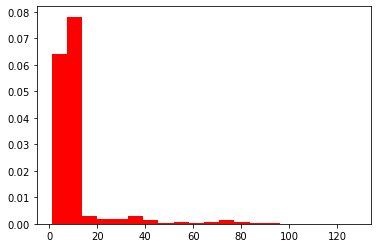

In [16]:
plt.hist(actual_roughness['npts'], density=True, bins=20, label='npts', color='red', alpha=1)  # density=False would make counts
plt.show()


## filter for npoints >= 10 and write out new dataset


shape of filtered DS: (33086, 15)


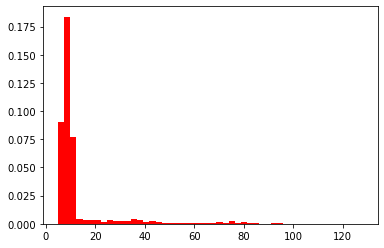

In [17]:
threshold_cut = 5
atm_transect_npts_filtered = actual_roughness.loc[actual_roughness['npts']>=threshold_cut]
print('shape of filtered DS: (%s, %s)' %atm_transect_npts_filtered.shape)


plt.hist(atm_transect_npts_filtered['npts'], density=True, bins=50, label='npts', color='red', alpha=1)  # density=False would make counts
plt.show()



# write out the new filtered dataset 

# output_filename = "atmmodel_july_2016_k_zero_npts_larger"+str(threshold_cut)+".csv"
# output_ds = os.path.join(trainingDS_dir, output_filename)
# atm_transect_npts_filtered.to_csv(output_ds, index=False)
# print(output_ds)


## Select a single POB to extract transect and other info


In [18]:
# note: we selected an arbiterary POB as following 
# Arbitrary POB (from unique POB)

####################################################
# April-2016
# pob_notCloudy_list = [[97, 86904, 25, 3.0],
#                             [88, 86918, 27, 1.0],
#                             [97, 86904, 26, 10.0],
#                             [97, 86904, 23,  8.0],
#                             [113, 86905, 21, 11.0],
#                             [79, 86932, 32, 8.0],
#                             [88, 86918, 28, 1.0],
#                             [79, 86932, 30,  8.0],
#                             [71, 87048, 26, 7.0],
#                             [79, 86932, 29,  8.0],
#                             [79, 86932, 28,  7.0],
#                             [97, 86904, 24, 1.0]]
####################################################
# Note: this info is for selecting a POB from atmmodel.csv

# April-2016
pob_notCloudy_list = [[79, 86932, 32]]


# July-2016
# pob_notCloudy_list = [[94, 88229, 30]]


print('total roughness images: %s' %len(pob_notCloudy_list))

pob_elem = 0
selected_path = pob_notCloudy_list[pob_elem][0]
selected_orbit = pob_notCloudy_list[pob_elem][1]
selected_block = pob_notCloudy_list[pob_elem][2]

print(selected_path)
print(selected_orbit)
print(selected_block)

total roughness images: 1
79
86932
32


procedure: 


1- check POB images in the new atmmodel_k_zero.csv file and check if they are dark or cloudy

2- pick a POB image that is not cloudy and is available

3- prediction: compute roughness array for that POB

4- then plot transect: compare model against truth 

5- confirm this is the best atmmodel with npts and k=today

6- prediction for all images

7- array2raster, geolocate, mosaics, maps

In [19]:
# # delete the first column

# atm_transect_small.drop(labels='Unnamed: 0', axis=1, inplace=True)
# atm_transect_small.columns

In [20]:
# set filters to select a MISR block in atmmodel.csv dataset

path_filter = (actual_roughness['path']==selected_path)
orbit_filter = (actual_roughness['orbit']==selected_orbit)
block_filter = (actual_roughness['block']==selected_block)

atm_transect_in_block = actual_roughness.loc[path_filter & orbit_filter & block_filter]
print('Shape of our dataset after filtering for our target block... (%s, %s)' %atm_transect_in_block.shape)
atm_transect_in_block.head()


Shape of our dataset after filtering for our target block... (634, 15)


,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var
4914,79,86932,32,0,667,72.781010,204.529114,0.673427,0.793588,0.805800,11.963750,1.0,8.0,-1,1.973208
4915,79,86932,32,1,667,72.779082,204.525051,0.695570,0.807917,0.826152,10.442000,1.0,5.0,-1,3.198821
4916,79,86932,32,1,666,72.777874,204.522484,0.718040,0.829083,0.826804,9.922500,1.0,4.0,-1,3.436040
4917,79,86932,32,2,666,72.776912,204.520435,0.729600,0.841458,0.834945,15.135556,1.0,9.0,-1,7.150419
4918,79,86932,32,3,666,72.774747,204.515830,0.738718,0.851878,0.838201,9.667778,1.0,9.0,-1,4.511040


## write out ATM transect for shapefile

In [21]:
# # write some portion of it

# atm_transect_in_block['lon_West'] = atm_transect_in_block['lon']-360

# trans_to_shapefile_df = atm_transect_in_block
# # trans_to_shapefile_df.to_csv(os.path.join(atmmodel_dir, 'atmmodel_april_2016_smallDS_transect_forshapefile.csv'), index=False)
# trans_to_shapefile_df.to_csv(os.path.join(atmmodel_dir, 'atmmodel_july_2016_transect_forshapefile.csv'), index=False)


## change size of samples

In [22]:
# maybe if we want to select a smaller subset of the selected transect, like the first 100 points (or 10)

# max_step = 200
max_step = atm_transect_in_block.shape[0]

atm_transect_in_block = atm_transect_in_block.iloc[0:max_step]

In [23]:
atm_transect_in_block.shape

(634, 15)

In [24]:
print(atm_transect_in_block['mean_ATM_roughness'].min())
print(atm_transect_in_block['mean_ATM_roughness'].max())

4.72
41.29875


In [25]:
# sort by column ("line")

# atm_transect_in_block.sort_values(by='line', axis=0, inplace=True) # axis=0 == column names
# atm_transect_in_block.head(50)


In [26]:
# check for duplicates in rows of dataset???




In [27]:
# zfill() path and string it

if selected_path < 100:
    path_str = str(selected_path).zfill(3)
else:
    path_str = str(selected_path)


# zfill() block and string it
if selected_block < 10:
    block_str = str(selected_block).zfill(2)
else:
    block_str = str(selected_block)

## >>> finding our single roughness file from pattern of roughness.dat file >>>

In [32]:
# roughness_file_pattern = "roughness_toa_refl_P"+path_str+"_O0"+str(selected_orbit)+"_B0"+block_str+"_r_025"+".dat"
roughness_file_pattern = "roughness_toa_refl_P"+path_str+"_O0"+str(selected_orbit)+"_B0"+block_str+"_r_010"+".dat"

print('looking for pattern: %s' %roughness_file_pattern)

# find roughness file
rough_file_list = glob.glob(os.path.join(predicted_roughness_dir, roughness_file_pattern))
print('found:')
print(rough_file_list)

if (len(rough_file_list) < 1):
    raise ValueError("roughness list is empty! did not find roughness file for your POB!")

if (len(rough_file_list) > 1):
    raise ValueError("roughness list has more that 1 file! there should be an error in our logic!")


    
    
# # open roughness binary file and change binary to array
# misr_rough_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
# print(misr_rough_2d_arr.shape)


looking for pattern: roughness_toa_refl_P079_O086932_B032_r_010.dat
found:
['/Volumes/Ehsan-7757225325/2016/april_2016/predict_roughness_k_zero_npts_10/all_polar_files_for_mosaic/test_mosaic_21april2016rasterio_r_025/test_transect/roughness_toa_refl_P079_O086932_B032_r_010.dat']


### >>> this part is for reading array from binary file tht was output of my own KNN model from other JN >>>

In [69]:
# this part is for reading array from csv file tht was output of my own KNN model in other JN
# .dat binary file for qgis
# .csv file for transect gof stats

rough_file_list_knn = '/Users/ehsanmos/MLP_dataset/transect_test_p79_b32/block_arr_p79_b32_knn_ehsan.dat'


misr_rough_2d_arr = np.fromfile(rough_file_list_knn, dtype=np.double)[0:1048576].reshape((512,-1))
print(misr_rough_2d_arr.shape)




(512, 2048)


In [70]:
print('min: %d' %misr_rough_2d_arr.min())
print('max: %d' %misr_rough_2d_arr.max())

min: -1
max: 23


In [71]:
# extract lat lon arrays
import numpy as np

misr_lat_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[1048576:2097152].reshape((512,-1))
print(misr_lat_2d_arr.dtype)
print(misr_lat_2d_arr.shape)

misr_lon_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[2097152:3145728].reshape((512,-1))
# print(misr_lon_2d_arr)


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Ehsan-7757225325/2016/april_2016/predict_roughness_k_zero_npts_10/all_polar_files_for_mosaic/test_mosaic_21april2016rasterio_r_025/test_transect/roughness_toa_refl_P079_O086932_B032_r_010.dat'

In [38]:
# # check value for sample lat-lon

# for end_black in range(misr_rough_2d_arr.shape[1]):
#     if misr_rough_2d_arr[0, end_black] > 0:
#         print(end_black)
#         break

In [39]:
# print(misr_rough_2d_arr[0, end_black-10])
# print(misr_lat_2d_arr[0, end_black-10])
# print(misr_lon_2d_arr[0, end_black-10])

<Figure size 432x288 with 0 Axes>

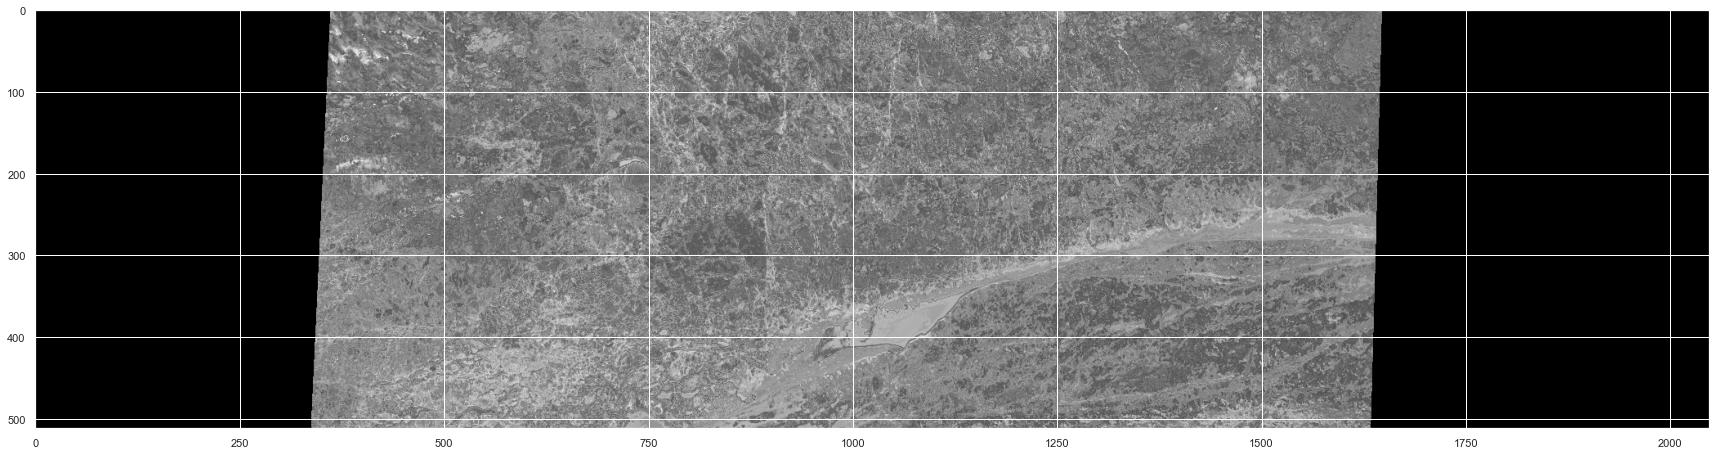

0

In [72]:
# plot roughness array from predcited/modeled roughness 

plot_here_and_write(misr_rough_2d_arr, atmmodel_dir)

In [41]:
# MVP with one line for lat-lon method

irow = 0

# find line/sample in the selected block
atm_line = atm_transect_in_block['line'].iloc[irow]
atm_sample = atm_transect_in_block['sample'].iloc[irow]
average_atm = atm_transect_in_block['mean_ATM_roughness'].iloc[irow]

atm_lat = atm_transect_in_block['lat'].iloc[irow]
atm_lon = atm_transect_in_block['lon'].iloc[irow]
if (atm_lon>180):
    atm_lon_west = atm_lon-360.0
    
print('%s, %s, %s, %s, %s' %(atm_line, atm_sample, average_atm, atm_lat, atm_lon_west))

0, 667, 11.96375, 72.78101, -155.470886


In [42]:
# # extract MISR roughness based on single lat-lon

# atm_lat = 81.050398
# atm_lon = -152.181889 # should use ATM-lon West format

# abslat = np.abs(misr_lat_2d_arr - atm_lat) # element-wise
# abslon = np.abs(misr_lon_2d_arr - atm_lon) # element-wise

# abslon

# maximum = np.maximum(abslon, abslat)
# print(maximum)


# latlon_idx = np.argmin(maximum) # for flaten array and lat-lon
# print(latlon_idx)


# # extract MISR roughness w/lat-lon

# roughness_in_grid = misr_rough_2d_arr.flat[latlon_idx]
# roughness_in_grid


# line_atm = (latlon_idx/2048)
# print('line: %s' %line_atm)

# sample_atm = (line_atm%1)*2048
# print('sample: %s' %sample_atm)



# # extract MISR roughness w/line-sample

# rough = misr_rough_2d_arr[int(line_atm), int(sample_atm)]
# rough




In [43]:
# # plot lat-lon diffs

# plot_error_mesh(c)
# # plot_error_mesh(abslon)

## find <roughess.dat> files == modeled roughness

* This section is very important because we have to find co-located observed (ATM) and modeled (MISR) roughness values for each pixel as our validation/performance test dataset. Then we use the dataset to calculate statistics about performance of our model prediction 

In [44]:
# misr_roughness_in_pixel_list = [] do not use it anymore
plot_ds = []

for irow in range(atm_transect_in_block.shape[0]):

    # find line/sample and mean ATM in the selected block
    atm_line = atm_transect_in_block['line'].iloc[irow]
    atm_sample = atm_transect_in_block['sample'].iloc[irow]
    average_atm = atm_transect_in_block['mean_ATM_roughness'].iloc[irow]
#     print(atm_line, atm_sample)
    
    atm_lat = atm_transect_in_block['lat'].iloc[irow]
    atm_lon = atm_transect_in_block['lon'].iloc[irow]
    
    if (atm_lon>180):
        atm_lon_west = atm_lon-360.0
        


    ######## we find MISR based on line-sample == pixel that ATM sample falls into it   
    # each pixel
    misr_roughness_in_pixel_lineSample = misr_rough_2d_arr[atm_line, atm_sample]
    misr_neighborhood_ls = misr_roughness_in_pixel_lineSample
    
    
    # average of neighborhood 
#     misr_roughness_in_pixel_lineSample = misr_rough_2d_arr[atm_line, atm_sample]
#     misr_roughness_in_pixel_lineSample_up = misr_rough_2d_arr[atm_line-1, atm_sample]
#     misr_roughness_in_pixel_lineSample_down = misr_rough_2d_arr[atm_line+1, atm_sample]
#     misr_roughness_in_pixel_lineSample_before = misr_rough_2d_arr[atm_line, atm_sample-1]
#     misr_roughness_in_pixel_lineSample_after = misr_rough_2d_arr[atm_line, atm_sample+1]
#     misr_roughness_in_pixel_lineSample_up_before = misr_rough_2d_arr[atm_line-1, atm_sample-1]
#     misr_roughness_in_pixel_lineSample_up_after = misr_rough_2d_arr[atm_line-1, atm_sample+1]
#     misr_roughness_in_pixel_lineSample_down_before = misr_rough_2d_arr[atm_line+1, atm_sample-1]
#     misr_roughness_in_pixel_lineSample_down_after = misr_rough_2d_arr[atm_line+1, atm_sample+1]

#     misr_neighborhood_ls = [misr_roughness_in_pixel_lineSample,
#                            misr_roughness_in_pixel_lineSample_up,
#                            misr_roughness_in_pixel_lineSample_down,
#                            misr_roughness_in_pixel_lineSample_before,
#                            misr_roughness_in_pixel_lineSample_after,
#                            misr_roughness_in_pixel_lineSample_up_before,
#                            misr_roughness_in_pixel_lineSample_up_after,
#                            misr_roughness_in_pixel_lineSample_down_before,
#                            misr_roughness_in_pixel_lineSample_down_after]
    
    
    misr_roughness_in_pixel_ls = np.mean(misr_neighborhood_ls)
    print('LS mean: %s' %misr_roughness_in_pixel_ls)
    
    #################################################################
    
    # find MISR pixels based on lat-lon
    abslat = np.abs(misr_lat_2d_arr - atm_lat) # element-wise
    abslon = np.abs(misr_lon_2d_arr - atm_lon_west) # element-wise, should use ATM lon West format here
    # 
    maximum = np.maximum(abslon, abslat)
    latlon_idx = np.argmin(maximum) # for flaten array and lat-lon
    
    
    # based on lat-lon
    misr_roughness_in_pixel_latlon_in_pixel = misr_rough_2d_arr.flat[latlon_idx]
    misr_neighborhood_latlon = misr_roughness_in_pixel_latlon_in_pixel

    
    
    
#     misr_roughness_in_pixel_latlon_in_pixel = misr_rough_2d_arr.flat[latlon_idx]
#     misr_roughness_in_pixel_latlon_up = misr_rough_2d_arr.flat[latlon_idx-2048]
#     misr_roughness_in_pixel_latlon_down = misr_rough_2d_arr.flat[latlon_idx+2048]
#     misr_roughness_in_pixel_latlon_up_before = misr_rough_2d_arr.flat[latlon_idx-2048-1]
#     misr_roughness_in_pixel_latlon_up_after = misr_rough_2d_arr.flat[latlon_idx-2048+1]
#     misr_roughness_in_pixel_latlon_down_before = misr_rough_2d_arr.flat[latlon_idx+2048-1]
#     misr_roughness_in_pixel_latlon_down_after = misr_rough_2d_arr.flat[latlon_idx+2048+1]
#     misr_roughness_in_pixel_latlon_before = misr_rough_2d_arr.flat[latlon_idx-1]
#     misr_roughness_in_pixel_latlon_after = misr_rough_2d_arr.flat[latlon_idx+1]
    
    
    
    
#     misr_neighborhood_latlon = [misr_roughness_in_pixel_latlon_in_pixel,\
#                          misr_roughness_in_pixel_latlon_up,\
#                          misr_roughness_in_pixel_latlon_down,\
#                          misr_roughness_in_pixel_latlon_up_before,\
#                          misr_roughness_in_pixel_latlon_up_after,\
#                          misr_roughness_in_pixel_latlon_down_before,\
#                          misr_roughness_in_pixel_latlon_down_after,\
#                          misr_roughness_in_pixel_latlon_before,\
#                          misr_roughness_in_pixel_latlon_after]
                         

    
#     print(misr_neighborhood)
    misr_roughness_in_pixel_latlon = np.mean(misr_neighborhood_latlon)
    print('latlon mean: %s' %misr_roughness_in_pixel_latlon)
    



#     c = np.maximum(abslon, abslat)
#     latlon_idx = np.argmin(c) # for flaten array
#     roughness_in_grid = misr_rough_2d_arr.flat[latlon_idx]
#     print(roughness_in_grid)
    
    # append predixted value to our list
    plot_ds.append((atm_line, atm_sample, atm_lat, atm_lon_west, average_atm, misr_roughness_in_pixel_ls, misr_roughness_in_pixel_latlon)) #roughness_in_grid))

#     if misr_roughness > 1:
#         misr_roughness_in_pixel_list.append(misr_roughness)
#     else:
#         print('MISR roughness in pixel: %s' %misr_roughness)
#         raise ValueError("why MISR roughness is negative for an ATM location? model error? or something else?")

plot_ds_column_names = ['atm_lin', 'atm_sample', 'atm_lat', 'atm_lon_west', 'mean_ATM', 'modeled_roughness_in_pixel_lineSample', 'modeled_roughness_in_pixel_latlon']

print("\ntotal predicted roughness pixels found: %s" %len(plot_ds))


LS mean: 10.043406000000001
latlon mean: 10.043406000000001
LS mean: 15.270940099999999
latlon mean: 15.270940099999999
LS mean: 16.147379199999996
latlon mean: 14.095944
LS mean: 11.5773544
latlon mean: 16.147379199999996
LS mean: 12.100472300000002
latlon mean: 11.5773544
LS mean: 11.5428492
latlon mean: 12.100472300000002
LS mean: 11.9732192
latlon mean: 11.5428492
LS mean: 10.660419199999998
latlon mean: 10.660419199999998
LS mean: 12.7398347
latlon mean: 12.7398347
LS mean: 14.1333846
latlon mean: 14.1333846
LS mean: 12.126878199999998
latlon mean: 12.126878199999998
LS mean: 13.8469536
latlon mean: 17.544686
LS mean: 14.185513199999999
latlon mean: 13.8469536
LS mean: 11.655569100000001
latlon mean: 14.185513199999999
LS mean: 13.416259399999998
latlon mean: 11.655569100000001
LS mean: 14.338801799999999
latlon mean: 13.416259399999998
LS mean: 12.506944
latlon mean: 12.506944
LS mean: 9.6960783
latlon mean: 9.6960783
LS mean: 13.5458727
latlon mean: 13.5458727
LS mean: 11.267272

latlon mean: 16.553002599999996
LS mean: 14.038669299999999
latlon mean: 14.038669299999999
LS mean: 15.2476238
latlon mean: 15.354693800000002
LS mean: 15.354693800000002
latlon mean: 15.354693800000002
LS mean: 15.6280398
latlon mean: 15.955872
LS mean: 15.955872
latlon mean: 15.955872
LS mean: 19.0587245
latlon mean: 16.2981592
LS mean: 16.2981592
latlon mean: 16.2981592
LS mean: 16.9282334
latlon mean: 16.8613003
LS mean: 16.8613003
latlon mean: 16.8613003
LS mean: 17.446531000000004
latlon mean: 16.9282334
LS mean: 15.814864200000002
latlon mean: 17.446531000000004
LS mean: 16.333616900000003
latlon mean: 17.446531000000004
LS mean: 17.485027900000002
latlon mean: 16.333616900000003
LS mean: 15.591340500000001
latlon mean: 16.333616900000003
LS mean: 14.4985342
latlon mean: 15.591340500000001
LS mean: 12.856597299999999
latlon mean: 15.591340500000001
LS mean: 10.9875501
latlon mean: 12.856597299999999
LS mean: 13.473192799999998
latlon mean: 12.856597299999999
LS mean: 12.9388702

latlon mean: 12.5819212
LS mean: 8.7404182
latlon mean: 8.7404182
LS mean: 9.6046455
latlon mean: 9.6046455
LS mean: 10.4588
latlon mean: 10.4588
LS mean: 10.035
latlon mean: 10.4582758
LS mean: 14.294567899999999
latlon mean: 10.4582758
LS mean: 11.8660778
latlon mean: 14.294567899999999
LS mean: 8.6308703
latlon mean: 11.8660778
LS mean: 8.741446100000001
latlon mean: 8.6308703
LS mean: 10.4561307
latlon mean: 10.4561307
LS mean: 12.128276199999998
latlon mean: 12.128276199999998
LS mean: 11.898840700000001
latlon mean: 11.898840700000001
LS mean: 10.3027876
latlon mean: 10.3027876
LS mean: 9.5275971
latlon mean: 16.6117219
LS mean: 16.6117219
latlon mean: 9.5275971
LS mean: 13.957432800000001
latlon mean: 16.6117219
LS mean: 10.4497031
latlon mean: 13.957432800000001
LS mean: 8.4602819
latlon mean: 10.4497031
LS mean: 10.0554092
latlon mean: 10.0554092
LS mean: 10.317691
latlon mean: 10.317691
LS mean: 9.5549546
latlon mean: 9.5549546
LS mean: 9.855463699999998
latlon mean: 9.855463

latlon mean: 11.1843818
LS mean: 12.946509099999997
latlon mean: 12.946509099999997
LS mean: 6.642999999999999
latlon mean: 6.642999999999999
LS mean: 11.5004727
latlon mean: 11.5004727
LS mean: 12.1366818
latlon mean: 12.1366818
LS mean: 11.4549818
latlon mean: 12.7257818
LS mean: 12.1155
latlon mean: 11.4549818
LS mean: 10.6000091
latlon mean: 12.1155
LS mean: 9.4504
latlon mean: 10.6000091
LS mean: 7.926899999999999
latlon mean: 9.4504
LS mean: 9.1812273
latlon mean: 9.1812273
LS mean: 9.442630300000001
latlon mean: 9.442630300000001
LS mean: 11.445972700000002
latlon mean: 11.445972700000002
LS mean: 12.1372192
latlon mean: 12.953872700000002
LS mean: 11.8035621
latlon mean: 12.1372192
LS mean: 12.650672700000001
latlon mean: 11.8035621
LS mean: 7.9150818
latlon mean: 12.650672700000001
LS mean: 9.278681800000001
latlon mean: 7.9150818
LS mean: 10.102418199999999
latlon mean: 10.102418199999999
LS mean: 9.310787399999999
latlon mean: 9.310787399999999
LS mean: 12.0688335
latlon mea

In [45]:
plot_ds_column_names

['atm_lin',
 'atm_sample',
 'atm_lat',
 'atm_lon_west',
 'mean_ATM',
 'modeled_roughness_in_pixel_lineSample',
 'modeled_roughness_in_pixel_latlon']

In [46]:
atm_transect_in_block.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', 'npts', ' cloud', ' var'],
      dtype='object')

In [47]:
# # build a single DF from both ATM and MISR lists and add "misr_roughness_in_pixel_list" to it

# atm_transect_in_block['MISR-roughness'] = misr_roughness_in_pixel_list
# atm_transect_in_block.columns

In [48]:
# # remove negative values from DF

# negative_misr_index_list = atm_transect_in_block.loc[atm_transect_in_block['MISR-roughness'] < 0].index
# print("size of list before removing negative MISR-rough data: %s" %len(atm_transect_in_block))
# atm_transect_in_block.drop(negative_misr_index_list, axis='index', inplace=True)
# print("size of list after removing negative MISR-rough data: %s" %len(atm_transect_in_block))


In [49]:
# row_count = atm_transect_in_block.shape[0]
# row_count

In [50]:
# build a dataframe from list of columns

eval_data = pd.DataFrame(plot_ds, columns=plot_ds_column_names)
# plot_df['modeled_roughness_in_pixel_latlon'].head(10)
print(eval_data.head())

   atm_lin  atm_sample    atm_lat  atm_lon_west   mean_ATM  \
0        0         667  72.781010   -155.470886  11.963750   
1        1         667  72.779082   -155.474949  10.442000   
2        1         666  72.777874   -155.477516   9.922500   
3        2         666  72.776912   -155.479565  15.135556   
4        3         666  72.774747   -155.484170   9.667778   

   modeled_roughness_in_pixel_lineSample  modeled_roughness_in_pixel_latlon  
0                              10.043406                          10.043406  
1                              15.270940                          15.270940  
2                              16.147379                          14.095944  
3                              11.577354                          16.147379  
4                              12.100472                          11.577354  


In [51]:
# remove -1 from dataset

remove_negatives(eval_data, 'modeled_roughness_in_pixel_latlon')
# plot_df

size of list before removing negative MISR-rough data: 634
size of list after removing negative MISR-rough data: 634


0

## plot transect

plot based on line-sample method

In [68]:
# x= range(eval_data.shape[0])
# fig1, ax = plt.subplots(figsize=(10, 6))
# # Specify how our lines should look
# ax.plot(x, eval_data['mean_ATM'], color='black', label='mean-ATM-per-pixel')
# ax.plot(x, eval_data['misr_roughness_in_pixel_lineSample'], color='red', label='MISR-estimate-per-pixel')
# # Same as above
# ax.set_ylim([0, 60])
# ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
# ax.set_ylabel('Roughness (cm)')
# ax.set_title('ATM and MISR-estimated Sea Ice Roughness LineSample_Pixel-based')
# ax.grid(True)
# ax.legend(loc='upper right')


# # save plot
# plot_name = "trans_linesample_"+sim_month+'_'+'npts_'+str(atm_npts)+'_p'+str(selected_path)+'_'+'o'+str(selected_orbit)+'_'+'b'+str(selected_block)
# # plot_name
# # plot_output_dir
# fig1.savefig(os.path.join(plot_output_dir, plot_name))



plot based on lat-lon method

/Volumes/Ehsan-7757225325/2016/plot_dir/trans_latlon_April_2016_npts_10_p79_o86932_b32.png


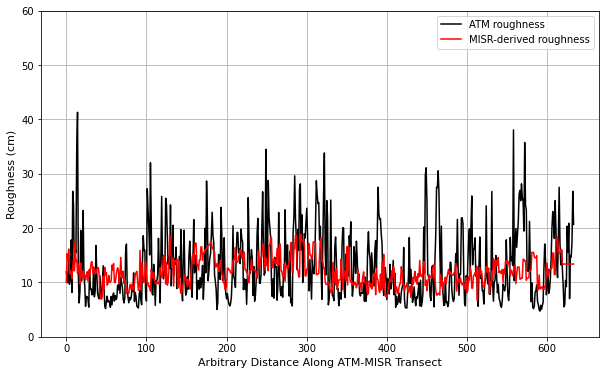

In [53]:
x= range(eval_data.shape[0])
fig2, ax = plt.subplots(figsize=(10, 6))
# Specify how our lines should look
ax.plot(x, eval_data['mean_ATM'], color='black', label='ATM roughness')
ax.plot(x, eval_data['modeled_roughness_in_pixel_latlon'], color='red', label='MISR-derived roughness')
# Same as above
ax.set_ylim([0, 60])
ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect', fontsize = 11)
ax.set_ylabel('Roughness (cm)', fontsize = 11)
# ax.set_title('ATM and MISR-estimated Sea Ice Roughness LatLon-based')
ax.grid(True)
ax.legend(loc='upper right')

plt.rc('legend', fontsize=11)    # legend fontsize

# save plot
plot_name = "trans_latlon_"+sim_month+'_'+'npts_'+str(atm_npts)+'_p'+str(selected_path)+'_'+'o'+str(selected_orbit)+'_'+'b'+str(selected_block)+'.png'
# plot_output_dir
save_path = os.path.join(plot_output_dir, plot_name)
print(save_path)
fig2.savefig(save_path)


In [54]:
# # x = range(len(misr_roughness_in_pixel_list))
# x= range(row_count)

# fig, ax = plt.subplots(figsize=(10, 6))

# # Specify how our lines should look
# ax.plot(x, atm_transect_in_block['mean_ATM_roughness'], color='black', label='mean-ATM-per-pixel')
# ax.plot(x, atm_transect_in_block['MISR-roughness'], color='red', label='MISR-estimated-per-pixel')

# # Same as above
# ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
# ax.set_ylabel('Roughness (cm)')
# ax.set_title('ATM and MISR-estimated Sea Ice Roughness')
# ax.grid(True)
# ax.legend(loc='upper right');

In [55]:
bin_size = 20

## histogram of transect

In [56]:
# plt.hist(plot_df['mean_ATM'], density=True, bins=bin_size, label='ATM', color='black', alpha=0.5)  # density=False would make counts
# plt.hist(plot_df['misr_roughness_in_pixel_lineSample'], density=True, bins=bin_size, label='MISR', color='red', alpha=0.5)  # density=False would make counts
# plt.xlim(0,80)

# plt.xlabel('Roughness')
# plt.ylabel('Frequency')
# plt.legend(loc="upper right")
# plt.title("Histogram")


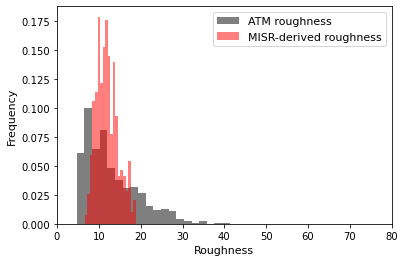

In [57]:
plt.hist(eval_data['mean_ATM'], density=True, bins=bin_size, label='ATM roughness', color='black', alpha=0.5)  # density=False would make counts
plt.hist(eval_data['modeled_roughness_in_pixel_latlon'], density=True, bins=bin_size, label='MISR-derived roughness', color='red', alpha=0.5)  # density=False would make counts
plt.xlim(0,80)

plt.xlabel('Roughness', fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.legend(loc="upper right")
# plt.title("ATM vs. MISR for %s" %sim_month_hist_label)

plt.rc('legend', fontsize=11)    # legend fontsize

# save plot
plot_name = "hist_latlon_"+sim_month+'_'+'npts_'+str(atm_npts)+'_p'+str(selected_path)+'_'+'o'+str(selected_orbit)+'_'+'b'+str(selected_block)
plot_name
# plot_output_dir
plt.savefig(os.path.join(plot_output_dir, plot_name))


## statistics of transect

In [58]:
# describe the statistics

stats_atm = eval_data['mean_ATM'].describe()
print(stats_atm)

stats_name = "stats_atm_"+sim_month+'_'+'npts_'+str(atm_npts)+'_p'+str(selected_path)+'_'+'o'+str(selected_orbit)+'_'+'b'+str(selected_block)+'.csv'
print(stats_name)

stats_atm.to_csv(os.path.join(plot_output_dir, stats_name))


count    634.000000
mean      12.967014
std        6.373726
min        4.720000
25%        7.967163
50%       11.213889
75%       16.422837
max       41.298750
Name: mean_ATM, dtype: float64
stats_atm_April_2016_npts_10_p79_o86932_b32.csv


In [59]:
stats_misr = eval_data['modeled_roughness_in_pixel_latlon'].describe()
print(stats_misr)

stats_name = "stats_misr_predict_"+sim_month+'_'+'npts_'+str(atm_npts)+'_p'+str(selected_path)+'_'+'o'+str(selected_orbit)+'_'+'b'+str(selected_block)+'.csv'
print(stats_name)

stats_misr.to_csv(os.path.join(plot_output_dir, stats_name))


count    634.000000
mean      11.962842
std        2.539006
min        6.643000
25%        9.994413
50%       11.765611
75%       13.476764
max       18.834059
Name: modeled_roughness_in_pixel_latlon, dtype: float64
stats_misr_predict_April_2016_npts_10_p79_o86932_b32.csv


## R^2 on test data/ model prediction

we seperated out dataset to train+test. we used train dataset to build our KNN model. test dataset is some blocks that we kept aside and did not include in training dataset so that later we report our model performance on the test dataset. our test dataset are 2 predicted roughness blocks for April and July2016.

In [60]:
y_actual = eval_data['mean_ATM']
y_predicted = eval_data['modeled_roughness_in_pixel_latlon']

In [61]:
# Using sklearn
# from sklearn.metrics import r2_score

corr_matrix = np.corrcoef(y_actual, y_predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print('R^2 on test data: %s' %round(R_sq,2))

# r2_model = r2_score(y_actual, y_predicted)

R^2 on test data: 0.02


### plot R^2 for observation and modeled roughness

In [62]:
# fig, ax = plt.subplots()
# ax.scatter(y_actual, y_predicted)
# ax.plot([y_actual.min(), y_actual.max()], [y_predicted.min(), y_predicted.max()], 'k--', lw=4)
# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')

# #regression line
# # y_test, y_predicted = y_test.reshape(-1,1), y_predicted.reshape(-1,1)
# # ax.plot(y_test, LinearRegression().fit(y_test, y_predicted).predict(y_test))

# plt.show()

# ## later download data and plot them in Excel

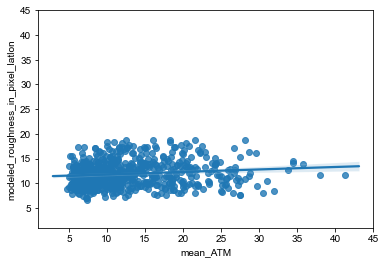

In [63]:
import seaborn as sns
fig, ax = plt.subplots()
sns.set_theme(color_codes=True)
sns.regplot(x=y_actual, y=y_predicted, truncate=False, ax=ax)#, color='g')
ax.set_xlim(1, 45)
ax.set_ylim(1, 45)
plt.show()

In [64]:
# To calculate the RMSE between the actual and predicted values

#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
model_sqrt = sqrt((mean_squared_error(y_actual, y_predicted))) 
print('model RMSE: %s' %round(model_sqrt, 2))

model RMSE: 6.63


### Residual plot

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residual plot')

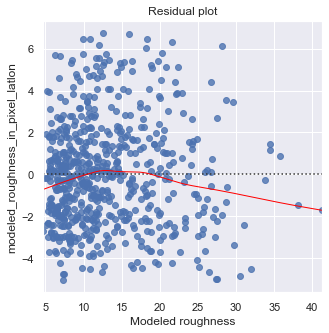

In [73]:
import seaborn as sns

# residuals = y_actual - y_predicted

fig, ax = plt.subplots(figsize =(5,5))
sns.residplot(y_actual, y_predicted, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})

# ax.set(ylabel='residuals',xlabel='fitted values')

plt.xlabel("Modeled roughness")
plt.title('Residual plot')

## QQ plot

Text(0.5, 1.0, 'Normal Q-Q Plot')

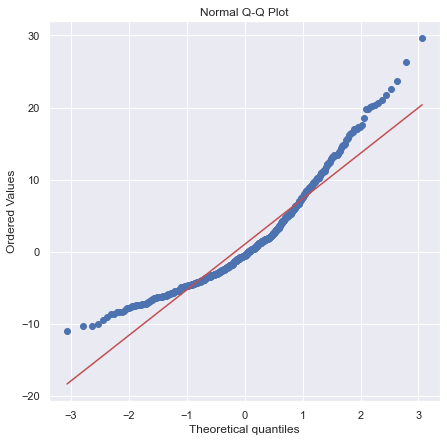

In [74]:
import scipy.stats as stats

residuals = y_actual - y_predicted
residuals

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

## now calculate histogram and statistics for the whole BOX

In [ ]:
# misr_roughness_in_pixel_list_box = find_misr_roughness_per_pixel(atm_transect_small)

In [ ]:
# # build a single DF from both ATM and MISR lists and add "misr_roughness_in_pixel_list" to it

# atm_transect_small['MISR-roughness'] = misr_roughness_in_pixel_list_box
# atm_transect_small.columns

In [ ]:
# # remove negative values from DF

# negative_misr_index_list_box = atm_transect_small.loc[atm_transect_small['MISR-roughness'] < 0].index
# print("size of list before removing negative MISR-rough data: %s" %len(atm_transect_small))

# atm_transect_small.drop(negative_misr_index_list_box, axis='index', inplace=True)
# print("size of list after removing negative MISR-rough data: %s" %len(atm_transect_small))


## plot histogram for BOX

In [ ]:
# hist_bounds = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
# n, bins, bounds=plt.hist(atm_transect_small['mean_ATM_roughness'], density=True, bins=hist_bounds, label='ATM', color='black', alpha=0.5)  # density=False would make counts
# plt.hist(atm_transect_small['MISR-roughness'], density=True, bins=hist_bounds, label='MISR', color='red', alpha=0.5)  # density=False would make counts

# plt.xticks(bins)
# plt.xlabel('Roughness')
# # plt.xticks(range(10))

# plt.ylabel('Frequency')
# plt.legend(loc="upper right")
# plt.title("ATM vs. MISR for %s" %sim_month)
